# BackTest——中证500分钟数据策略测试
@author: Jerry
@contact: lvjy3.15@sem.tsinghua.edu.com
@file: demo_zz500.py
@time: 2016/5/20 17:47
* 在5分钟均线高于十分钟均线0.5元的情况下买入半仓，其他时刻空仓，每隔两分钟判断一次
* 测试期 2013-01-01 到2013-03-01 两个月
* 手续费偏高

######## Reading data ########
2014-01-01
2014-03-01
Get 8880 obersevations from 2014-01-02 09:31:00 to 2014-02-28 15:00:00
########     Done     ########
-----------Performance Analysis-------------
Sharpe ratio : -50.835
Average year return : -1.819
Maximum draw down : -0.732
Annualized return volatility : 0.036


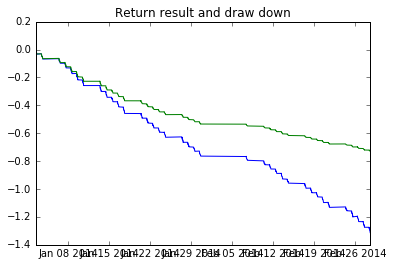

--------------Rsik Analysis----------------
Average PnL : -8249.8
Average cash ratio : 0.567
Average leverage : 0.433
Winning rate : 0.375
--------------------End--------------------


In [3]:
# -*- encoding=utf8 -*-

from backtest import BackTest
%matplotlib inline


class Strategy(BackTest):
    def __init__(self,model_name, begin_time, end_time, begin_equity, fee,
                path, universe,freq,length, lag,short):
        BackTest.__init__(self,model_name, begin_time, end_time, begin_equity, fee,
                 path, universe,freq,length, lag,short)

    def handle_data(self):
        '''
        The trade strategy part
        :return: none
        '''

        MA5 = self.strat.MA(5,'close')  # get MA5
        MA10 = self.strat.MA(10,'close') # get MA10

        if MA5['zz500'] > MA10['zz500'] - 0.5:
            self.broker.order_pct_to('zz500',-0.5)
        else:
            self.broker.order_pct_to('zz500',0.5)

def main():
    bt = Strategy(model_name='mm',
                  begin_time="2014-01-01",
                  end_time="2014-03-01",
                  path='E:\\data',
                  universe = 'zz500',
                  begin_equity=  100000000,
                  fee = 0.002,
                  freq =2,
                  length=10,
                  lag=1,
                  short=True)
    perf, risk = bt.start()

if __name__ == '__main__':
    main()